# Warren Co., 3-8818.00, CPT Analysis

In [1]:
import importlib
import csv
import pandas as pd
import numpy as np

In [2]:
import main
importlib.reload(main) # Reload py file to get updates in file if resaved

<module 'main' from 'c:\\Users\\clayt\\Documents\\Python Scripts\\CPTPython\\main.py'>

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Summary Interpretation

In [4]:
col = ['Hole','Layer','Layer Thickness (m)','Int. Class Roberts 1990','Est. I_R (unitless)']
data = [
    ['2001','1',3.700,'Silt Mix',769.75],
    ['2001','2',0.872,'Sandy Mix',367.92],
    ['2001','3',3.648,'Silt Mix',687.19],
    ['2002','1',4.150,'Silt Mix',877.30],
    ['2002','2',1.350,'Sandy Mix',400.01,],
    ['2002','3',3.160,'Silt Mix',690.96],
    ['2003','1',4.000,'Silt Mix',875.64],
    ['2003','2',0.600,'Sandy Mix',328.61],
    ['2003','3',4.500,'Clays',815.66],
    ['2003','4',0.680,'Sandy Mix',332.58]
]

df_push = pd.DataFrame(data,columns=col)
df_push

,Hole,Layer,Layer Thickness (m),Int. Class Roberts 1990,Est. I_R (unitless)
0,2001,1,3.700,Silt Mix,769.75
1,2001,2,0.872,Sandy Mix,367.92
2,2001,3,3.648,Silt Mix,687.19
3,2002,1,4.150,Silt Mix,877.30
4,2002,2,1.350,Sandy Mix,400.01
5,2002,3,3.160,Silt Mix,690.96
6,2003,1,4.000,Silt Mix,875.64
7,2003,2,0.600,Sandy Mix,328.61
8,2003,3,4.500,Clays,815.66
9,2003,4,0.680,Sandy Mix,332.58


In [5]:
print("Summary of Dissipation Data")
col = ['Hole', 'Depth (m)', 'Depth (ft)', 'u0 (kPa)', 'est. water depth (ft)', 't50 (secs)', 't50 (kPa)','Layer','Int. Class Roberts 1990','Est. I_R']
data = [[2001,1.527,5.0,0,-1,125,-16,'1','Silt Mix',769.75],
[2001,3.047,10.0,0,-1,375,115,'1','Silt Mix',769.75],
[2001,4.870,16.0,0,-1,20,2,'3','Silt Mix',687.19],
[2001,6.202,20.3,0,-1,150,300,'3','Silt Mix',687.19],
[2001,7.700,25.3,9,22.3,25,37,'3','Silt Mix',687.19],
[2002,3.030,9.9,0,-1,250,100,'1','Silt Mix',877.30],
[2002,3.590,11.8,0,-1,162,262,'1','Silt Mix',877.30],
[2002,4.650,15.3,0,-1,162,82,'2','Sandy Mix',400.01],
[2002,6.130,20.1,0,-1,150,325,'3','Silt Mix',690.96],
[2002,7.652,25.1,2.5,24.3,None,None,'3','Silt Mix',690.96],
[2002,8.660,28.4,13,24.1,25,22,'3','Silt Mix',690.96],
[2003,3.090,10.1,0,-1,300,230,'1','Silt Mix',875.64],
[2003,6.127,20.1,0,-1,None,None,'3','Clays',815.66],
[2003,7.717,25.3,9,22.3,30,20,'3','Clays',815.66],
[2003,9.790,32.1,29.4,22.3,3750,202,'4','Sandy Mix',332.58]]
df_diss = pd.DataFrame(data, columns=col)
df_diss

Summary of Dissipation Data


,Hole,Depth (m),Depth (ft),u0 (kPa),est. water depth (ft),t50 (secs),t50 (kPa),Layer,Int. Class Roberts 1990,Est. I_R
0,2001,1.527,5.0,0.0,-1.0,125.0,-16.0,1,Silt Mix,769.75
1,2001,3.047,10.0,0.0,-1.0,375.0,115.0,1,Silt Mix,769.75
2,2001,4.870,16.0,0.0,-1.0,20.0,2.0,3,Silt Mix,687.19
3,2001,6.202,20.3,0.0,-1.0,150.0,300.0,3,Silt Mix,687.19
4,2001,7.700,25.3,9.0,22.3,25.0,37.0,3,Silt Mix,687.19
5,2002,3.030,9.9,0.0,-1.0,250.0,100.0,1,Silt Mix,877.30
6,2002,3.590,11.8,0.0,-1.0,162.0,262.0,1,Silt Mix,877.30
7,2002,4.650,15.3,0.0,-1.0,162.0,82.0,2,Sandy Mix,400.01
8,2002,6.130,20.1,0.0,-1.0,150.0,325.0,3,Silt Mix,690.96
9,2002,7.652,25.1,2.5,24.3,NaN,NaN,3,Silt Mix,690.96


In [6]:
print('Estimated Cv and k')
df_diss['Est. cv (cm2/sec)'] = df_diss.apply(lambda x: main.estimated_coefficient_of_consolidation(x['t50 (secs)'],
                                                                                                  x['Est. I_R']), axis=1)
df_diss['Est. k (cm/sec)'] = df_diss.apply(lambda x: main.estimated_hydraulic_conductivity(x['t50 (secs)']),axis=1)
df_diss['Est. cv (m2/sec)'] = df_diss.apply(lambda x: x['Est. cv (cm2/sec)']/10000,axis=1)
df_diss['Est. cv (ft2/day)'] = df_diss.apply(lambda x: x['Est. cv (cm2/sec)']*93,axis=1)
df_diss[['Hole','Depth (ft)','t50 (secs)','Est. I_R','Int. Class Roberts 1990','Est. k (cm/sec)','Est. cv (cm2/sec)','Est. cv (m2/sec)','Est. cv (ft2/day)']]

Estimated Cv and k


,Hole,Depth (ft),t50 (secs),Est. I_R,Int. Class Roberts 1990,Est. k (cm/sec),Est. cv (cm2/sec),Est. cv (m2/sec),Est. cv (ft2/day)
0,2001,5.0,125.0,769.75,Silt Mix,2.394806e-06,0.111125,1.111254e-05,10.334667
1,2001,10.0,375.0,769.75,Silt Mix,6.065530e-07,0.037042,3.704182e-06,3.444889
2,2001,16.0,20.0,687.19,Silt Mix,2.366575e-05,0.637880,6.378799e-05,59.322827
3,2001,20.3,150.0,687.19,Silt Mix,1.906750e-06,0.085051,8.505065e-06,7.909710
4,2001,25.3,25.0,687.19,Silt Mix,1.790535e-05,0.510304,5.103039e-05,47.458261
5,2002,9.9,250.0,877.30,Silt Mix,1.006892e-06,0.061289,6.128897e-06,5.699875
6,2002,11.8,162.0,877.30,Silt Mix,1.731865e-06,0.094582,9.458175e-06,8.796103
7,2002,15.3,162.0,400.01,Sandy Mix,1.731865e-06,0.052481,5.248067e-06,4.880702
8,2002,20.1,150.0,690.96,Silt Mix,1.906750e-06,0.085400,8.540036e-06,7.942233
9,2002,25.1,NaN,690.96,Silt Mix,NaN,NaN,NaN,NaN


In [7]:
df_diss.describe()

,Hole,Depth (m),Depth (ft),u0 (kPa),est. water depth (ft),t50 (secs),t50 (kPa),Est. I_R,Est. cv (cm2/sec),Est. k (cm/sec),Est. cv (m2/sec),Est. cv (ft2/day)
count,15.000000,15.000000,15.000000,15.000000,15.00000,13.000000,13.000000,15.000000,13.000000,1.300000e+01,1.300000e+01,13.000000
mean,2001.933333,5.585467,18.320000,4.193333,7.02000,424.923077,129.307692,711.206667,0.209547,6.604155e-06,2.095473e-05,19.487901
std,0.798809,2.426455,7.960994,8.184695,11.75331,1005.153924,120.093286,159.025976,0.230794,8.458478e-06,2.307936e-05,21.463805
min,2001.000000,1.527000,5.000000,0.000000,-1.00000,20.000000,-16.000000,332.580000,0.001974,3.410898e-08,1.974022e-07,0.183584
25%,2001.000000,3.340000,10.950000,0.000000,-1.00000,30.000000,22.000000,687.190000,0.052481,1.006892e-06,5.248067e-06,4.880702
50%,2002.000000,6.127000,20.100000,0.000000,-1.00000,150.000000,100.000000,690.960000,0.085400,1.906750e-06,8.540036e-06,7.942233
75%,2002.500000,7.676000,25.200000,5.750000,22.30000,250.000000,230.000000,815.660000,0.483584,1.425628e-05,4.835840e-05,44.973307
max,2003.000000,9.790000,32.100000,29.400000,24.30000,3750.000000,325.000000,877.300000,0.637880,2.366575e-05,6.378799e-05,59.322827


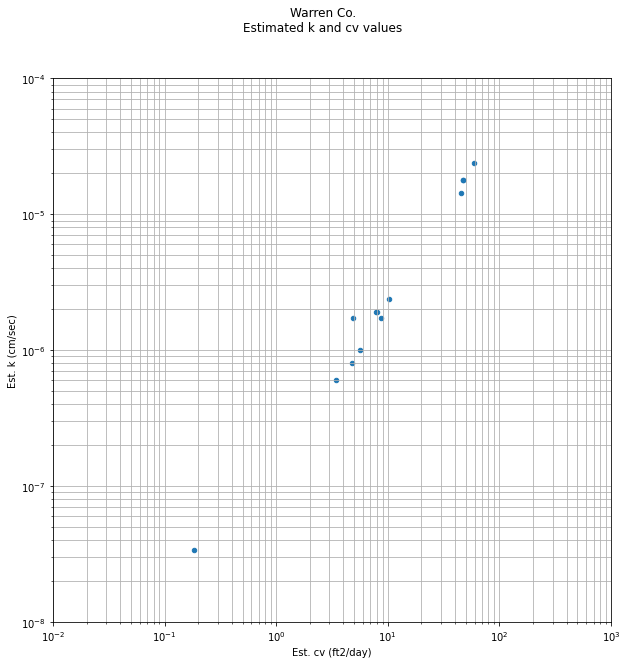

In [7]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Warren Co.\nEstimated k and cv values')
ax = fig.add_subplot(111)
df_diss.plot.scatter(x='Est. cv (ft2/day)',y='Est. k (cm/sec)',ax=ax)
ax.loglog()
ax.set_xlim(1e-2,1e+3)
ax.set_ylim(1e-8,1e-4)
ax.grid(True,which='both')
plt.show()

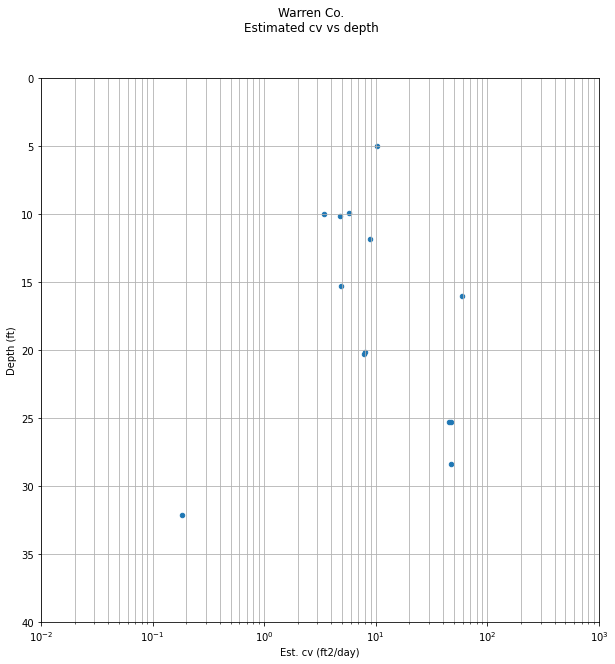

In [12]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Warren Co.\nEstimated cv vs depth')
ax = fig.add_subplot(111)
df_diss.plot.scatter(x='Est. cv (ft2/day)',y='Depth (ft)',ax=ax)
ax.set_xscale('log')
ax.set_ylim(40,0)
ax.set_xlim(1e-2,1e+3)
ax.grid(True,which='both')
plt.show()


# CPT Push Graphs
<i> To use the “rules of thumb” method, some helpful guidelines are to assume sands are identified when qt > 725 psi (5 MPa) and u2 ≈ uo, while the presence of intact clays are prevalent when qt < 725 psi and u2 > uo. The magnitude of porewater pressures help to indicate intact clays such as, soft (u2 ≈ 2·uo), firm (u2 ≈ 4·uo), stiff (u2 ≈ 8·uo), and hard (u2 ≈ 20·uo). Fissured overconsolidated clays tend to have negative u2 values such that u2 < 0. </i> (pg 6, Saftner, 2018)

In [9]:
def push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override):
    """
    Summary Analysis of Layer
    """
    print(title)
    # Calculate Estimated Unit Weight
    gamma_total_metric = main.soil_weight_est(fs, 'MPa', weight_return_units='kN/m3')
    gamma_total_english = main.soil_weight_est(fs, 'MPa', weight_return_units='pcf')
    print("Estimated total unit weight:\n{:.2f} kN/m3\n{:.2f} pcf".format(gamma_total_metric,gamma_total_english))

    # Calculated Total Pressure
    total_pressure = main.effective_overburden_pressure(gamma_total_metric,depth_in_layer=depth_in_layer,depth_below_water_table=depth_below_water_table,above_pressure=pressure_above)
    total_pressure_MPa = main.convert(total_pressure,'kPa','MPa')
    print("\nTotal pressure at {:.2f} m: {:.2f} kN/m2".format(depth,total_pressure))

    # Calculated Fr Index
    Fr = main.normalized_friction_ratio(fs,qt,total_pressure_MPa)
    print("\nFriction Ratio: {:.2f}%".format(Fr))

    # Calculated CPT Material Index
    Q_tn, Ic, n = main.cpt_material_index(qt,total_pressure_MPa,total_pressure_MPa,Fr,n_override=n_override)
    SBTn = main.SBTn_zone(Fr,Q_tn)
    print('\nCalculated Classification by\nRobertson 1990:\n{}, {}'.format(SBTn[0],SBTn[1]))

    # Estimated Undrained Shear Strength
    Su_MPa = main.estimated_undrained_shear_strength(qt,total_pressure_MPa)
    Su_psf = main.convert(Su_MPa,'MPa','psf')
    print('\nEstimated Undrained Shear Strength:\n{:.2f} MPa\n{:.2f} psf'.format(Su_MPa,Su_psf))

    # Estimated Shear Wave Velocity
    Vs_ms = main.estimated_shear_wave_velocity(main.convert(qt,'MPa','kPa'),main.convert(fs, 'MPa', 'kPa'))
    Vs_fts = main.convert(Vs_ms,'m/s','ft/s')
    print('\nEstimated Shear Wave Velocity:\n{:.2f} m/s\n{:.2f} ft/s'.format(Vs_ms,Vs_fts))

    # Estimated Small Strain Shear Modulus, G_max
    G_max_kPa = main.estimated_small_strain_shear_modulus(gamma_total_metric,Vs_ms)
    G_max_psi = main.convert(G_max_kPa,'kPa','psi')
    print('\nEstimated Small Strain Shear Modulus:\n{:.2f} kPa\n{:.2f} psi'.format(G_max_kPa,G_max_psi))

    # Undrained Rigitiy Index
    I_R = main.undrained_rigidity_index(G_max_kPa,main.convert(Su_MPa,'MPa','kPa'))
    print('\nEstimated Undrained Rigitiy Index:\n{:.2f} (unitless)'.format(I_R))


# Hole 2001

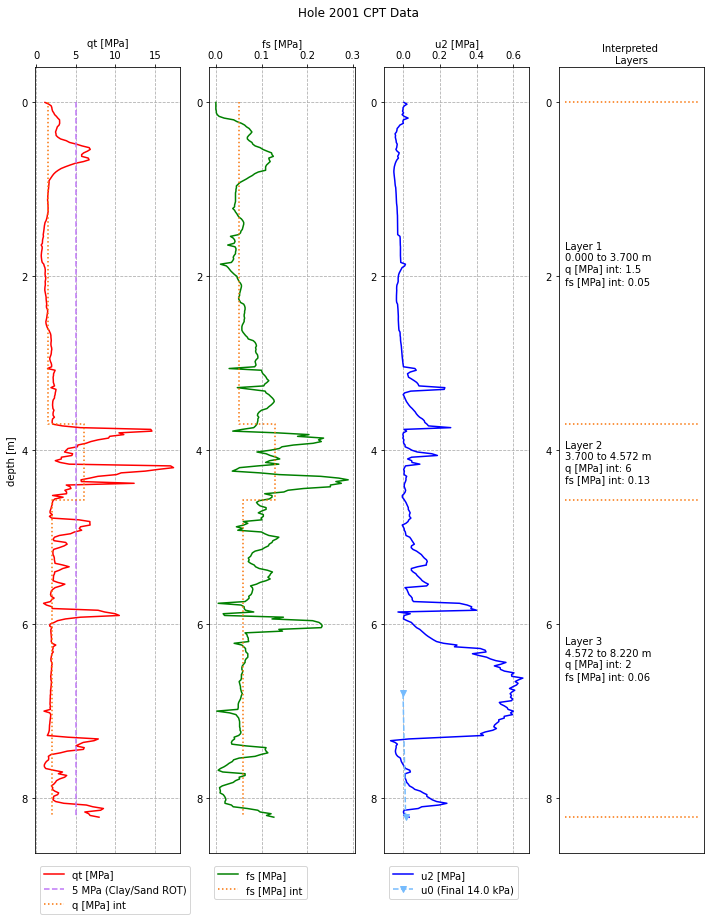

In [10]:
# Hole 2001
name = "Hole 2001"
with open("Warren Co., 3-8818.00\\push\\2020-11-09 Warren Co S-087-2020 Hole 2001 Test 1.CSV") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]

# Calculate qt
qt = []
for i, qc_value in enumerate(qc):
    qt.append(main.corrected_cone_resistance(qc_value,u2[i]))

push_2001 = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2,
       'qt [MPa]': qt}

# Hole 2001 Interpreted Layers
int_2001 = {'layer name':   ['Layer 1','Layer 2','Layer 3'],
            'layers [m]':   [3.700,4.572,8.220],
            'q [MPa] int': [1.5,6,2],
            'fs [MPa] int': [0.05,0.13,0.06]
           }

main.plot_push(push_2001['H [m]'],push_2001['qt [MPa]'],push_2001['fs [MPa]'],push_2001['u2 [MPa]'],
               title = 'Hole 2001 CPT Data',depth_unit='m',
               u0_start_m = 6.797,
               int_dict=int_2001,
               q_corrected=True)

In [11]:
# Hole 2001 Layer 1
title = 'Hole 2001 Layer 1'
qt = 1.5 #MPa
fs = 0.05 #MPa
depth = 3.700 #m
depth_in_layer = 3.700 #m
pressure_above = 0
depth_below_water_table = 0
n_override = False

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2001 Layer 1
Estimated total unit weight:
17.70 kN/m3
113.69 pcf

Total pressure at 3.70 m: 65.49 kN/m2

Friction Ratio: 3.49%

Calculated Classification by
Robertson 1990:
Zone 4, Silt Mix

Estimated Undrained Shear Strength:
0.12 MPa
2496.70 psf

Estimated Shear Wave Velocity:
225.83 m/s
740.91 ft/s

Estimated Small Strain Shear Modulus:
92018.02 kPa
13346.11 psi

Estimated Undrained Rigitiy Index:
769.75 (unitless)


In [12]:
# Hole 2001 Layer 2
title = 'Hole 2001 Layer 2'
qt = 6.0 #MPa
fs = 0.13 #MPa
depth = 3.700 + 0.872 #m
depth_in_layer = 0.872 #m
pressure_above = 65.49 #kN/m2
depth_below_water_table = 0
n_override = False

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2001 Layer 2
Estimated total unit weight:
19.11 kN/m3
122.72 pcf

Total pressure at 4.57 m: 82.15 kN/m2

Friction Ratio: 2.20%

Calculated Classification by
Robertson 1990:
Zone 5, Sandy Mixtures

Estimated Undrained Shear Strength:
0.49 MPa
10299.75 psf

Estimated Shear Wave Velocity:
305.23 m/s
1001.40 ft/s

Estimated Small Strain Shear Modulus:
181441.18 kPa
26315.87 psi

Estimated Undrained Rigitiy Index:
367.92 (unitless)


In [13]:
# Hole 2001 Layer 3
title = 'Hole 2001 Layer 3'
qt = 2.0 #MPa
fs = 0.06 #MPa
depth = 3.700 + 0.872 + 3.648 #m
depth_in_layer = 3.648 #m
pressure_above = 82.15 #kN/m2
depth_below_water_table = 1.423 #m
n_override = True

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2001 Layer 3
Estimated total unit weight:
17.97 kN/m3
115.41 pcf

Total pressure at 8.22 m: 133.74 kN/m2

Friction Ratio: 3.21%

Calculated Classification by
Robertson 1990:
Zone 4, Silt Mix

Estimated Undrained Shear Strength:
0.16 MPa
3248.14 psf

Estimated Shear Wave Velocity:
241.55 m/s
792.50 ft/s

Estimated Small Strain Shear Modulus:
106873.58 kPa
15500.73 psi

Estimated Undrained Rigitiy Index:
687.19 (unitless)


# Hole 2002

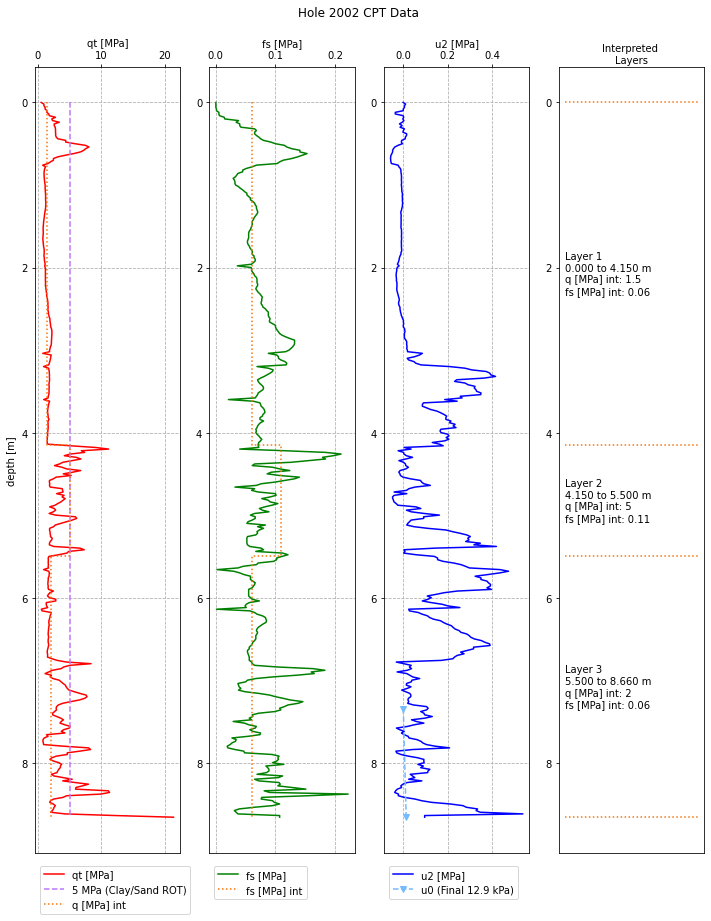

In [14]:
# Hole 2002
name = "Hole 2002"
with open("Warren Co., 3-8818.00\\push\\2020-11-09 Warren Co S-087-2020 Hole 2002 Test 1.CSV") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]

# Calculate qt
qt = []
for i, qc_value in enumerate(qc):
    qt.append(main.corrected_cone_resistance(qc_value,u2[i]))

push_2002 = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2,
       'qt [MPa]': qt}

# Hole 2002 Interpreted Layers
int_2002 = {'layer name':   ['Layer 1','Layer 2','Layer 3'],
            'layers [m]':   [4.15,5.5,8.66],
            'q [MPa] int': [1.5,5,2],
            'fs [MPa] int': [0.06,0.11,0.06]
           }

main.plot_push(push_2002['H [m]'],push_2002['qt [MPa]'],push_2002['fs [MPa]'],push_2002['u2 [MPa]'],
               title = 'Hole 2002 CPT Data',depth_unit='m',
               u0_start_m = 7.346,
               int_dict=int_2002,
               q_corrected=True)

In [15]:
# Hole 2002 Layer 1
title = 'Hole 2002 Layer 1'
qt = 1.5 #MPa
fs = 0.06 #MPa
depth = 4.150 #m
depth_in_layer = 4.15 #m
pressure_above = 0
depth_below_water_table = 0
n_override = False

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2002 Layer 1
Estimated total unit weight:
17.97 kN/m3
115.41 pcf

Total pressure at 4.15 m: 74.57 kN/m2

Friction Ratio: 4.21%

Calculated Classification by
Robertson 1990:
Zone 4, Silt Mix

Estimated Undrained Shear Strength:
0.12 MPa
2480.90 psf

Estimated Shear Wave Velocity:
238.53 m/s
782.57 ft/s

Estimated Small Strain Shear Modulus:
104210.56 kPa
15114.49 psi

Estimated Undrained Rigitiy Index:
877.30 (unitless)


In [16]:
# Hole 2002 Layer 2
title = 'Hole 2002 Layer 2'
qt = 5.0 #MPa
fs = 0.11 #MPa
depth = 4.150 + 1.35#m
depth_in_layer = 1.35 #m
pressure_above = 74.57 #kN/m2
depth_below_water_table = 0
n_override = False

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2002 Layer 2
Estimated total unit weight:
18.86 kN/m3
121.14 pcf

Total pressure at 5.50 m: 100.03 kN/m2

Friction Ratio: 2.24%

Calculated Classification by
Robertson 1990:
Zone 5, Sandy Mixtures

Estimated Undrained Shear Strength:
0.41 MPa
8528.18 psf

Estimated Shear Wave Velocity:
291.48 m/s
956.29 ft/s

Estimated Small Strain Shear Modulus:
163335.42 kPa
23689.84 psi

Estimated Undrained Rigitiy Index:
400.01 (unitless)


In [17]:
# Hole 2002 Layer 3
title = 'Hole 2002 Layer 3'
qt = 2.0 #MPa
fs = 0.06 #MPa
depth = 4.150 + 1.35 + 3.16#m
depth_in_layer = 3.16 #m
pressure_above = 100.03 #kN/m2
depth_below_water_table = 1.314 #m
n_override = True

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2002 Layer 3
Estimated total unit weight:
17.97 kN/m3
115.41 pcf

Total pressure at 8.66 m: 143.92 kN/m2

Friction Ratio: 3.23%

Calculated Classification by
Robertson 1990:
Zone 4, Silt Mix

Estimated Undrained Shear Strength:
0.15 MPa
3230.42 psf

Estimated Shear Wave Velocity:
241.55 m/s
792.50 ft/s

Estimated Small Strain Shear Modulus:
106873.58 kPa
15500.73 psi

Estimated Undrained Rigitiy Index:
690.96 (unitless)


# Hole 2003

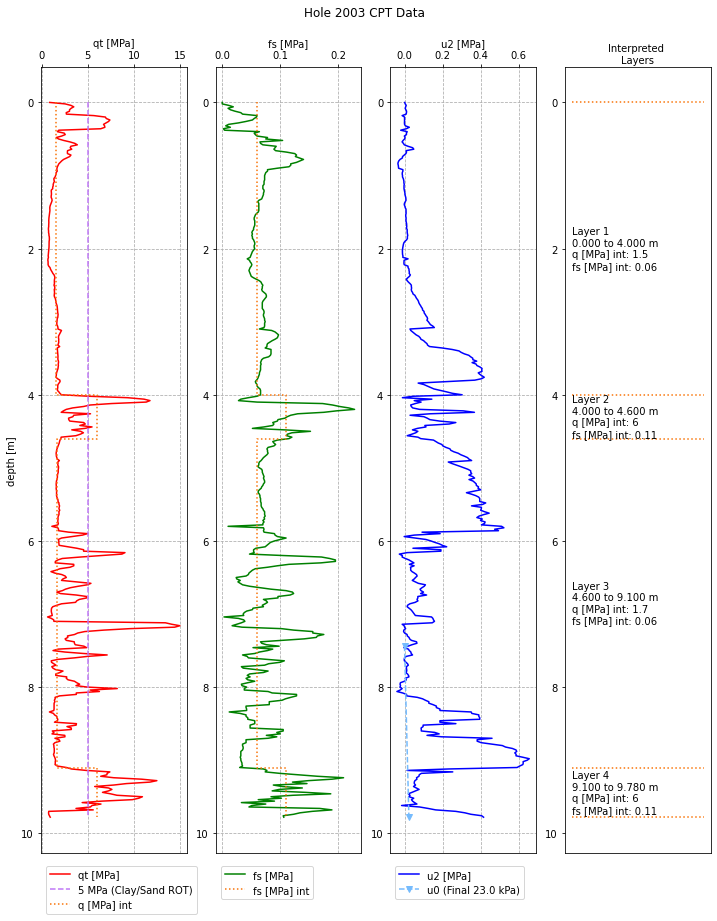

In [18]:
# Hole 2003
name = "Hole 2003"
with open("Warren Co., 3-8818.00\\push\\2020-11-10 Warren Co S-087-2020 Hole 2003 Test 1.CSV") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]
    
# Calculate qt
qt = []
for i, qc_value in enumerate(qc):
    qt.append(main.corrected_cone_resistance(qc_value,u2[i]))

push_2003 = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2,
       'qt [MPa]': qt}

# Hole 2003 Interpreted Layers
int_2003 = {'layer name':   ['Layer 1','Layer 2','Layer 3','Layer 4'],
            'layers [m]':   [4.0,4.6,9.1,9.78],
            'q [MPa] int': [1.5,6,1.7,6],
            'fs [MPa] int': [0.06,0.11,0.06,0.11]
           }

main.plot_push(push_2003['H [m]'],push_2003['qt [MPa]'],push_2003['fs [MPa]'],push_2003['u2 [MPa]'],
               title = 'Hole 2003 CPT Data',depth_unit='m',
               u0_start_m = 7.433,
               int_dict=int_2003,
               q_corrected=True)

In [19]:
title = 'Hole 2003 Layer 1'
qt = 1.5 #MPa
fs = 0.06 #MPa
depth = 4.00 #m
depth_in_layer = 4.00 #m
pressure_above = 0 #kN/m2
depth_below_water_table = 0 #m
n_override = False

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2003 Layer 1
Estimated total unit weight:
17.97 kN/m3
115.41 pcf

Total pressure at 4.00 m: 71.87 kN/m2

Friction Ratio: 4.20%

Calculated Classification by
Robertson 1990:
Zone 4, Silt Mix

Estimated Undrained Shear Strength:
0.12 MPa
2485.59 psf

Estimated Shear Wave Velocity:
238.53 m/s
782.57 ft/s

Estimated Small Strain Shear Modulus:
104210.56 kPa
15114.49 psi

Estimated Undrained Rigitiy Index:
875.64 (unitless)


In [20]:
title = 'Hole 2003 Layer 2'
qt = 6.0 #MPa
fs = 0.11 #MPa
depth = 4.00 + 0.6 #m
depth_in_layer = 0.6 #m
pressure_above = 71.87 #kN/m2
depth_below_water_table = 0 #m
n_override = False

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2003 Layer 2
Estimated total unit weight:
18.86 kN/m3
121.14 pcf

Total pressure at 4.60 m: 83.19 kN/m2

Friction Ratio: 1.86%

Calculated Classification by
Robertson 1990:
Zone 5, Sandy Mixtures

Estimated Undrained Shear Strength:
0.49 MPa
10297.95 psf

Estimated Shear Wave Velocity:
290.31 m/s
952.45 ft/s

Estimated Small Strain Shear Modulus:
162025.60 kPa
23499.87 psi

Estimated Undrained Rigitiy Index:
328.61 (unitless)


In [21]:
title = 'Hole 2003 Layer 3'
qt = 1.7 #MPa
fs = 0.06 #MPa
depth = 4.00 + 0.6 + 4.5 #m
depth_in_layer = 4.5 #m
pressure_above = 83.19 #kN/m2
depth_below_water_table = 1.667 #m
n_override = True

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2003 Layer 3
Estimated total unit weight:
17.97 kN/m3
115.41 pcf

Total pressure at 9.10 m: 147.69 kN/m2

Friction Ratio: 3.87%

Calculated Classification by
Robertson 1990:
Zone 3, Clays

Estimated Undrained Shear Strength:
0.13 MPa
2701.72 psf

Estimated Shear Wave Velocity:
240.01 m/s
787.44 ft/s

Estimated Small Strain Shear Modulus:
105513.14 kPa
15303.41 psi

Estimated Undrained Rigitiy Index:
815.66 (unitless)


In [22]:
title = 'Hole 2003 Layer 4'
qt = 6.0 #MPa
fs = 0.11 #MPa
depth = 4.00 + 0.6 + 4.5 + 0.68#m
depth_in_layer = 0.68 #m
pressure_above = 164.07 #kN/m2
depth_below_water_table = 2.347 #m
n_override = False

push_estimated_parameters(title,qt,fs,depth,depth_in_layer,pressure_above,depth_below_water_table,n_override)

Hole 2003 Layer 4
Estimated total unit weight:
18.86 kN/m3
121.14 pcf

Total pressure at 9.78 m: 153.87 kN/m2

Friction Ratio: 1.88%

Calculated Classification by
Robertson 1990:
Zone 5, Sandy Mixtures

Estimated Undrained Shear Strength:
0.49 MPa
10174.92 psf

Estimated Shear Wave Velocity:
290.31 m/s
952.45 ft/s

Estimated Small Strain Shear Modulus:
162025.60 kPa
23499.87 psi

Estimated Undrained Rigitiy Index:
332.58 (unitless)


## Dissipation Tests General Information

<i>"During a pause in penetration, any excess pore pressure generated around the cone will start to dissipate. The rate of dissipation depends upon the coefficient of consolidation, which in turn, depends on the compressibility and permeability of the soil. The rate of dissipation also depends on the diameter of the probe. A dissipation test can be performed at any required depth by stopping the penetration and measuring the decay of pore pressure with time. It is common to record the time to reach 50% dissipation (t50), as shown in Figure 18. If the equilibrium pore pressure is required, the dissipation test should continue until no further dissipation is observed. This can occur rapidly in sands, but may take many hours in plastic clays. Dissipation rate increases as probe size decreases."</i> (pg 18, Robertson and Robertson, 2012)

There can be localized dissipation of pore pressure before general dissipation of pore pressure. So in stiff clay there can be an increase before there is a decrease from pore pressure at the u2 location.

Important conversions to keep in mind:
- 1 foot head ~ 0.003 MPa ~ 3 kPa
- 1 meter head = 9.81 kPa
- 1 foot head = 0.433 psi

## Coefficient of Consolidation

<img src="img/coeff of consolidation.png"
     alt="img"
     style="float: center"
     width=700/>

Source: (Saftner, 2018)

## Hydraulic Conductivity

<img src="img/hydraulic conductivity.png"
     alt="img"
     style="float: center"
     width=700/>

Source: (Saftner, 2018)

## Warren Co., 3-8818.00, Specific Dissipation Testing

In [23]:
Hole2001 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-09 Warren Co S-087-2020 Hole 2001 Test 1.DPT')
Hole2002 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-09 Warren Co S-087-2020 Hole 2002 Test 1.DPT')
Hole2003 = main.diss_data_dict('Warren Co., 3-8818.00\\dissipation tests\\2020-11-10 Warren Co S-087-2020 Hole 2003 Test 1.DPT')

In [24]:
# Dissipation Tests
for hole in [Hole2001,Hole2002,Hole2003]:
    print('Hole {}'.format(hole['Hole Number'][0]))
    for k in hole['Dissipation Test Depth (m)']:
          print('{} (m) dissapation test'.format(k))

Hole 2001
1.527 (m) dissapation test
3.047 (m) dissapation test
4.870 (m) dissapation test
6.202 (m) dissapation test
7.700 (m) dissapation test
Hole 2002
3.030 (m) dissapation test
3.590 (m) dissapation test
4.650 (m) dissapation test
6.130 (m) dissapation test
7.652 (m) dissapation test
8.660 (m) dissapation test
Hole 2003
3.090 (m) dissapation test
6.127 (m) dissapation test
7.717 (m) dissapation test
9.790 (m) dissapation test


## Interpretation of Dissipation Data

### Hole 2001

Hole 2001 Diss Test at 1.527 (m) [5.0 ft]


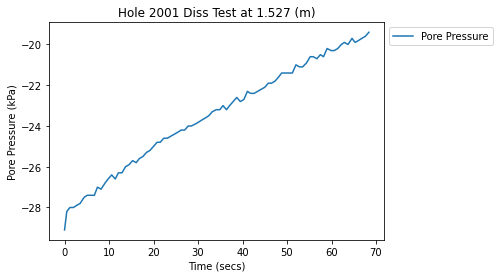

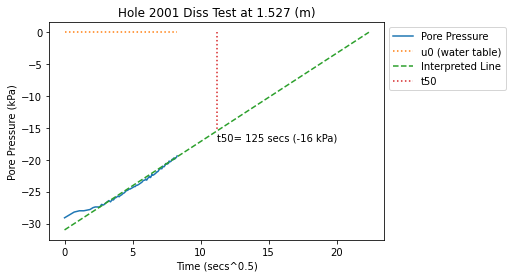

In [25]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'1.527','Hole 2001 Diss Test at 1.527 (m)',0,-31,0,500

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Notes:
The dissipation test was not run long enough to get a t50 value. The pore pressure started negative and this test was above the water table. No usable information about the permiability of the soil could be obatined from this data.

Hole 2001 Diss Test at 3.047 (m) [10.0 ft]


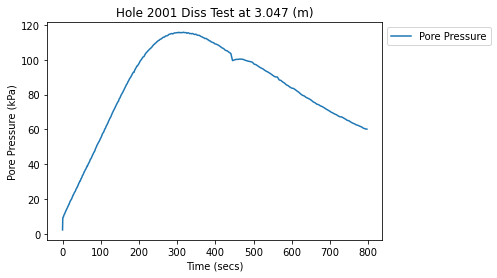

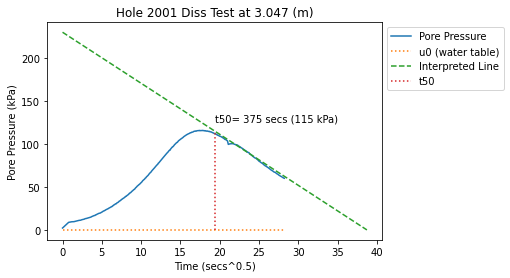

In [26]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'3.047','Hole 2001 Diss Test at 3.047 (m)',0,230,0,1500

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

The test looks to be run just long enough to interprete a t50 value of 375 seconds.

Hole 2001 Diss Test at 4.870 (m) [16.0 ft]


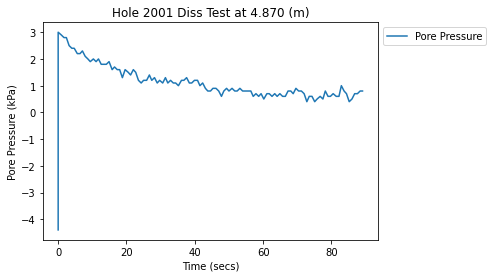

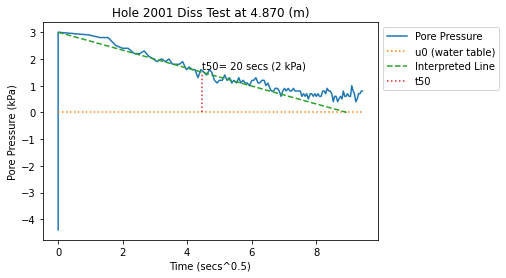

In [27]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf =  Hole2001,'4.870','Hole 2001 Diss Test at 4.870 (m)',0,3,0,80

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2001 Diss Test at 6.202 (m) [20.3 ft]


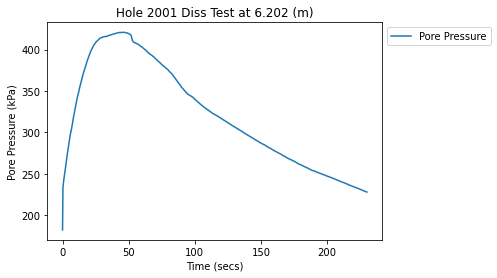

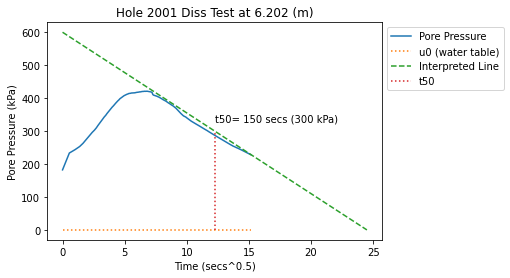

In [28]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2001,'6.202','Hole 2001 Diss Test at 6.202 (m)',0,600,0,600
# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,square_time=False)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2001 Diss Test at 7.700 (m) [25.3 ft]
Est. water depth 22.3 (ft)


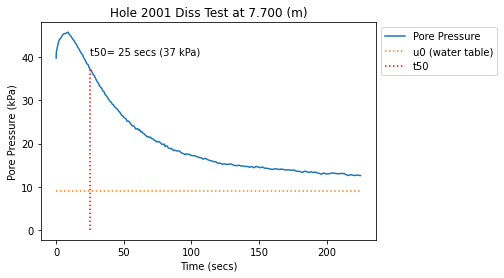

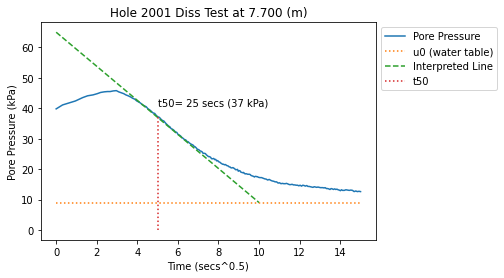

In [29]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = [Hole2001,'7.700','Hole 2001 Diss Test at 7.700 (m)',9,65,9,100]

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

### Hole 2002

Hole 2002 Diss Test at 3.030 (m) [9.9 ft]


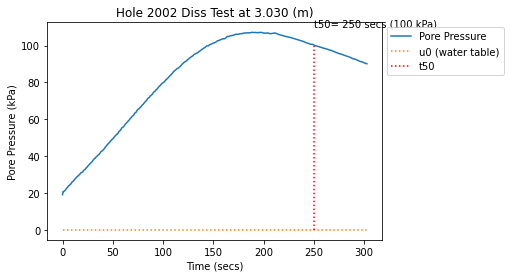

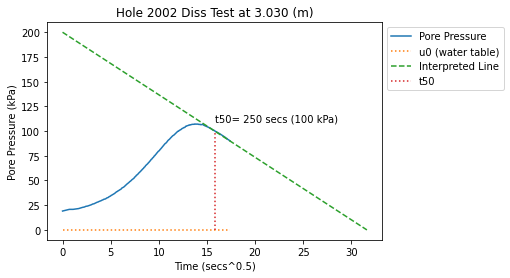

In [30]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf =  Hole2002,'3.030','Hole 2002 Diss Test at 3.030 (m)',0,200,0,1000

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 3.590 (m) [11.8 ft]


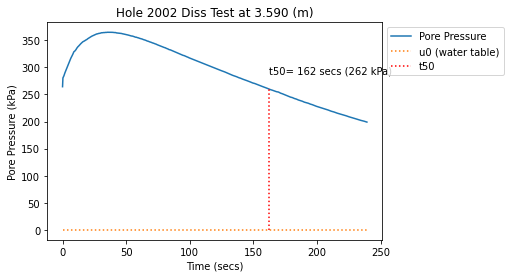

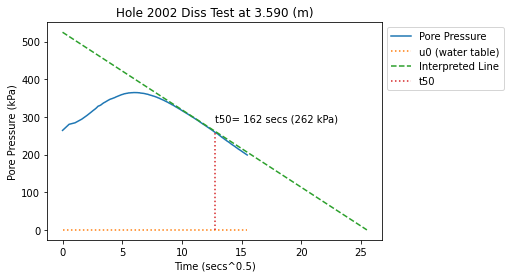

In [31]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'3.590','Hole 2002 Diss Test at 3.590 (m)',0,525,0,650

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 4.650 (m) [15.3 ft]


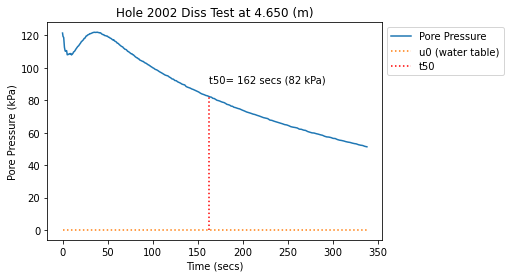

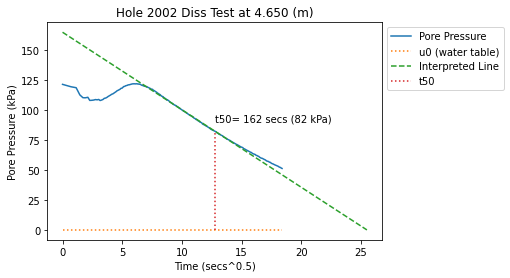

In [32]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'4.650','Hole 2002 Diss Test at 4.650 (m)',0,165,0,650

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 6.130 (m) [20.1 ft]


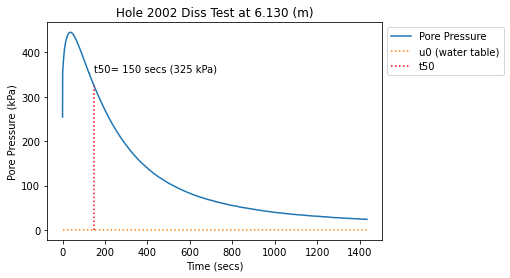

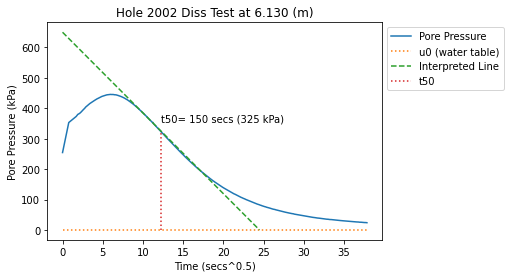

In [33]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'6.130','Hole 2002 Diss Test at 6.130 (m)',0,650,0,600

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 7.652 (m) [25.1 ft]
Est. water depth 24.3 (ft)


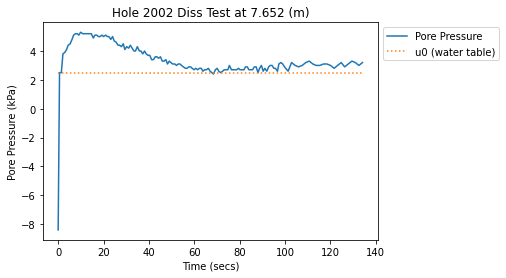

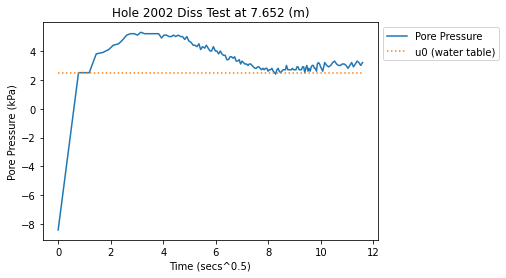

In [34]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'7.652','Hole 2002 Diss Test at 7.652 (m)',2.5,None,None,None

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2002 Diss Test at 8.660 (m) [28.4 ft]
Est. water depth 24.1 (ft)


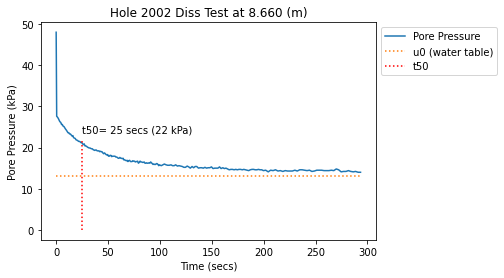

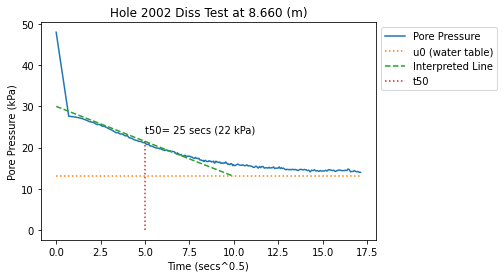

In [35]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2002,'8.660','Hole 2002 Diss Test at 8.660 (m)',13,30,13,100

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

### Hole 2003

Hole 2003 Diss Test at 3.090 (m) [10.1 ft]


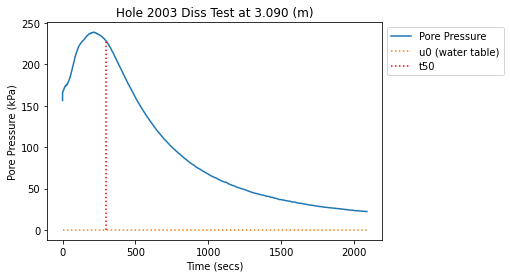

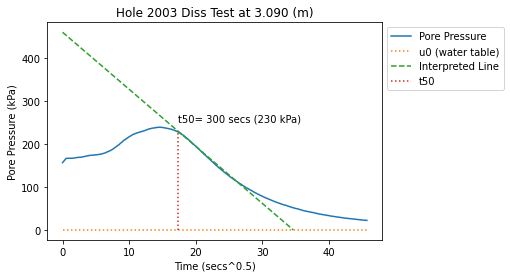

In [36]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'3.090','Hole 2003 Diss Test at 3.090 (m)',0,460,0,1200

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2003 Diss Test at 6.127 (m) [20.1 ft]


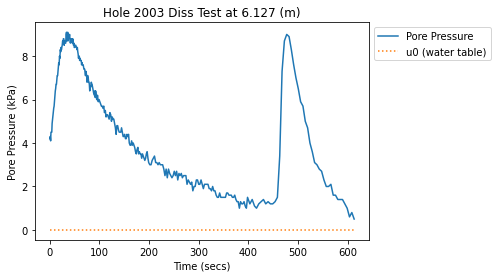

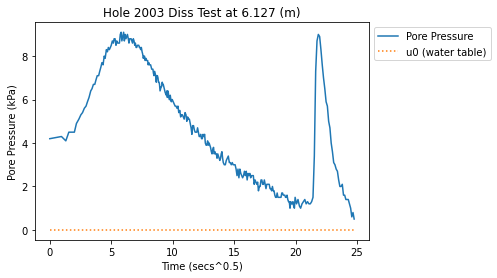

In [37]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'6.127','Hole 2003 Diss Test at 6.127 (m)',0,None,None,None

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2003 Diss Test at 7.717 (m) [25.3 ft]
Est. water depth 22.3 (ft)


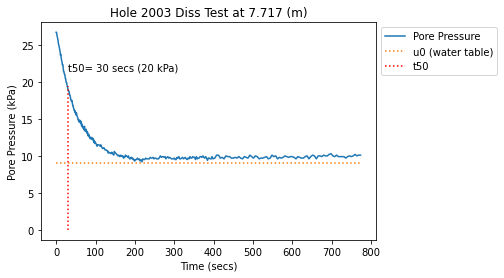

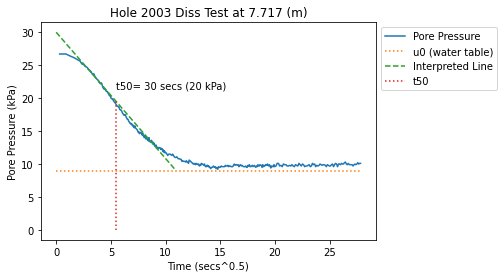

In [38]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'7.717','Hole 2003 Diss Test at 7.717 (m)',9,30,9,120

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)

Hole 2003 Diss Test at 9.790 (m) [32.1 ft]
Est. water depth 22.3 (ft)


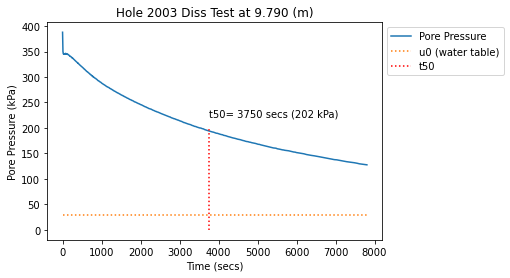

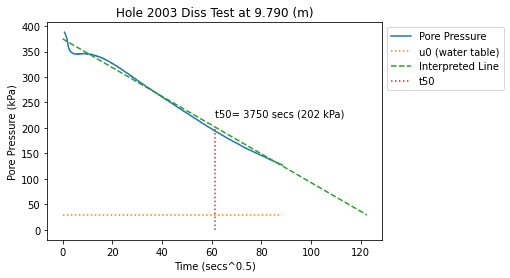

In [39]:
# Interpretation of Dissipation Data
hole,depth,title,u0,ui,uf,tf = Hole2003,'9.790','Hole 2003 Diss Test at 9.790 (m)',29.4,375,29.4,15000

# Plot Up Hole Dissipation Data
print("{} [{:.1f} ft]".format(title,main.convert(float(depth),"m","ft")))
print("Est. water depth {:.1f} (ft)".format(main.u0_to_water_table_depth(u0,float(depth),'m','ft')))
main.plot_diss(hole,depth,title,
square_time=False,u0=u0,
ui=ui,uf=uf,tf=tf)

main.plot_diss(hole,depth,title,
square_time=True,u0=u0,
ui=ui,uf=uf,tf=tf)